In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

C:\Users\Marakhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [94]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

#def predict(X, parameters):
#    
#    W1 = tf.convert_to_tensor(parameters["W1"])
#    b1 = tf.convert_to_tensor(parameters["b1"])
#    W2 = tf.convert_to_tensor(parameters["W2"])
#    b2 = tf.convert_to_tensor(parameters["b2"])
##    W3 = tf.convert_to_tensor(parameters["W3"])
##    b3 = tf.convert_to_tensor(parameters["b3"])
#    
##    params = {"W1": W1,
##              "b1": b1,
##              "W2": W2,
##              "b2": b2,
##              "W3": W3,
##              "b3": b3}
#
#    params = {"W1": W1,
#              "b1": b1,
#              "W2": W2,
#              "b2": b2}    
#    
#    x = tf.placeholder("float", [12288, 1])
#    
#    z3 = forward_propagation(x, params)
#    p = tf.argmax(z3)
#    
#    with tf.Session() as sess:
#        prediction = sess.run(p, feed_dict = {x: X})
#        
#    return prediction

In [ ]:
a = tf.constant(6)
b = tf.constant(2, tf.int32)

sess = tf.Session()
print(sess.run(a*b))

In [31]:
print(a)
sess.close()

Tensor("Const_29:0", shape=(), dtype=int32)


In [37]:
x=tf.placeholder(tf.float32)
c = (x*2)
sess = tf.Session()
print(sess.run(c,feed_dict = {x: 4}))
sess.close()

8.0


In [51]:
np.random.seed(1)
X = np.random.randn(3, 1)
W = np.random.randn(4, 3)
b = np.random.randn(4, 1)
sess = tf.Session()
print(sess.run(tf.convert_to_tensor(X)))
print(sess.run(tf.convert_to_tensor(W)))
print(sess.run(tf.convert_to_tensor(b)))
print(sess.run(tf.matmul(W,X)+b))

sess.close()

[[ 1.62434536]
 [-0.61175641]
 [-0.52817175]]
[[-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
[[-1.09989127]
 [-0.17242821]
 [-0.87785842]
 [ 0.04221375]]
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [57]:
np.random.seed(1)
X = np.random.randn(3, 1)
W = np.random.randn(4, 3)
b = np.random.randn(4, 1)
sess = tf.Session()
print(sess.run(tf.convert_to_tensor(X)))
print(sess.run(tf.convert_to_tensor(W)))
print(sess.run(tf.convert_to_tensor(b)))
print(sess.run(tf.matmul(W,X)+b))
print(sess.run(tf.sigmoid((tf.matmul(W,X)+b)+0.9)))
sess.close()

[[ 1.62434536]
 [-0.61175641]
 [-0.52817175]]
[[-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
[[-1.09989127]
 [-0.17242821]
 [-0.87785842]
 [ 0.04221375]]
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
[[0.22156425]
 [0.97934476]
 [0.45282379]
 [0.5136515 ]]


In [84]:
sess = tf.Session()
print(sess.run(tf.nn.sigmoid_cross_entropy_with_logits(logits=1.0, labels=1.0)))
sess.close()

0.31326172


In [28]:
a = np.array([1, 0, 3, 4, 2, 4, 2, 1])
b = np.zeros((5,8))
print(b)
b[a,np.arange(8)] = 1
print(b)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0.]]


In [26]:
a = np.array([1, 0, 3, 1, 2])
b = np.zeros((4, 5))
b[a, np.arange(5)] = 1
b

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [31]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
os.getcwd()

'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise'

In [6]:
img = cv2.imread('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\image5.JPG')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
A = 1193
for i in range(0,2113,350):
    for j in range(0,2961,350):
        if i >= 1751 or j >= 2451:
            break        
        crop_img = img[j:j+350, i:i+350]
        resize_img = cv2.resize(crop_img, (35,35), interpolation = cv2.INTER_AREA)
        file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\'+str(A)+'.jpg'
        cv2.imwrite(file_name, resize_img)
        A = A+1
        


In [21]:
i = 0
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\p\\*.JPG'): 
    im=cv2.imread(filename)
    if i == 0:
        x_train=np.expand_dims(im, axis=0)
        #plt.imshow(im)
        im = np.fliplr(im)
        x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
        i=i+1
    else:
        x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
        im = np.fliplr(im)
        x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
        
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\b\\*.JPG'): 
    im=cv2.imread(filename)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    im = np.fliplr(im)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)

i = 0
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\p\\*.JPG'): 
    im=cv2.imread(filename)
    if i == 0:
        x_test=np.expand_dims(im, axis=0)
        i=i+1
    else:
        x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)
        
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\b\\*.JPG'): 
    im=cv2.imread(filename)
    x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)
        
print(x_test[0,:,:,:])
x_train = x_train/255
x_test = x_test/255
#plt.imshow(x_test[0])
# cv2.imshow('img',x_test[47]/255)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


[[[141 194 227]
  [140 192 228]
  [144 196 233]
  ...
  [178 221 254]
  [178 221 254]
  [177 220 253]]

 [[106 165 197]
  [109 167 202]
  [117 175 210]
  ...
  [ 91 151 181]
  [ 91 151 181]
  [ 91 151 181]]

 [[105 173 202]
  [103 170 201]
  [111 178 211]
  ...
  [ 94 168 196]
  [ 94 168 196]
  [ 94 168 196]]

 ...

 [[119 187 216]
  [108 176 205]
  [119 187 216]
  ...
  [103 178 204]
  [103 178 204]
  [103 178 204]]

 [[124 192 221]
  [111 179 208]
  [118 186 215]
  ...
  [103 178 204]
  [103 178 204]
  [104 179 205]]

 [[117 185 214]
  [106 174 203]
  [116 184 213]
  ...
  [102 177 203]
  [103 178 204]
  [103 178 204]]]


In [7]:
print(image_list[0])
#print ("X_train shape: " + str(image_list.shape))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=35x35 at 0x16C5CBE4550>


In [10]:
image_list[200].show()

In [5]:
print(x_train.shape)
print(x_test.shape)

(756, 35, 35, 3)
(96, 35, 35, 3)


In [6]:
# y_train1 = np.zeros(186*2, dtype=int)
# y_train1 = np.concatenate((y_train1, np.ones(192*2, dtype=int)), axis=None)
# print(y_train1.shape)

# y_train = np.zeros((378*2, 2))
# y_train[np.arange(378*2), y_train1] = 1
# print(y_train.shape)

# y_test1 = np.ones(48, dtype=int)
# y_test1 = np.concatenate((y_test1, np.zeros(48, dtype=int)), axis=None)
# print(y_test1.shape)

# y_test = np.zeros((96,2))
# y_test[np.arange(96),y_test1] = 1
# print(y_test.shape)

y_train = np.zeros(186*2, dtype=int)
y_train = np.concatenate((y_train, np.ones(192*2, dtype=int)), axis=None)
y_train = y_train.reshape((756, 1))
print(y_train.shape)

y_test = np.zeros(48, dtype=int)
y_test = np.concatenate((y_test, np.ones(48, dtype=int)), axis=None)
y_test = y_test.reshape((96, 1))
print(y_test.shape)



(756, 1)
(96, 1)


[1]


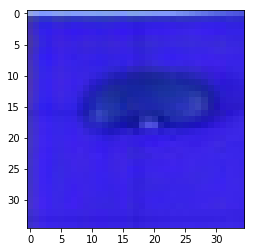

In [71]:
plt.imshow(x_train[500])
print(y_train[500])

Cost after epoch 0: 0.876058
Cost after epoch 5: 0.846745
Cost after epoch 10: 0.965677
Cost after epoch 15: 1.019833
Cost after epoch 20: 1.150319


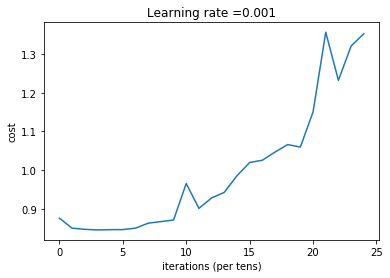

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9973545
Test Accuracy: 1.0


In [96]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])    
    return X, Y

def initialize_parameters():
    tf.set_random_seed(1)                               
    W1 = tf.get_variable("W1", [5, 5, 3, 30], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [5, 5, 30, 60], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters = {"W1": W1,
                  "W2": W2}    
    return parameters


def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')
    Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')
    P = tf.contrib.layers.flatten(P1)
    Z3 = tf.contrib.layers.fully_connected(P, 2, activation_fn=None)
    return Z3

def compute_cost(Z3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y)) 
    return cost

def model(X_train, Y_train, X_test, Y_test, learning_rate=0.001,
          num_epochs=25, minibatch_size=128, print_cost=True):
    
    ops.reset_default_graph()                          
    tf.set_random_seed(1)                              
    seed = 3                                           
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size)  
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches

            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters
    
_, _, parameters = model(x_train, y_train, x_test, y_test)

In [2]:
import numpy as np
import keras 
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [46]:
def HappyModel(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Dropout(0.25)(X)
    X = Flatten()(X)
    X = Dense(5, activation='sigmoid', name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [50]:
happyModel = HappyModel(x_train.shape[1:])
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
happyModel.fit(x_train, y_train, epochs=10, batch_size=150)
score = happyModel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
756/756 [==============================] - 29s 38ms/step - loss: 1.0134 - acc: 0.7085
Epoch 2/10
756/756 [==============================] - 27s 36ms/step - loss: 0.2988 - acc: 0.8606
Epoch 3/10
756/756 [==============================] - 27s 36ms/step - loss: 0.1595 - acc: 0.9262
Epoch 4/10
756/756 [==============================] - 27s 35ms/step - loss: 0.0984 - acc: 0.9601
Epoch 5/10
756/756 [==============================] - 27s 35ms/step - loss: 0.0646 - acc: 0.9799
Epoch 6/10
756/756 [==============================] - 27s 36ms/step - loss: 0.0532 - acc: 0.9823
Epoch 7/10
756/756 [==============================] - 28s 37ms/step - loss: 0.0330 - acc: 0.9862
Epoch 8/10
756/756 [==============================] - 27s 35ms/step - loss: 0.0434 - acc: 0.9881
Epoch 9/10
756/756 [==============================] - 27s 36ms/step - loss: 0.0409 - acc: 0.9865
Epoch 10/10
756/756 [==============================] - 27s 36ms/step - loss: 0.0291 - acc: 0.9921
Test loss: 0.0964142962669332

[[0. 1. 0. 0. 1.]]


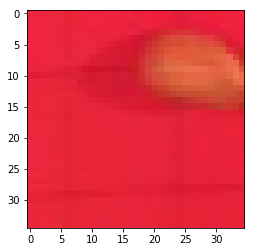

In [57]:
### START CODE HERE ###
img_path = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\pr\\217.JPG'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(35, 35))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

In [23]:
print(x_train[0,:,:,:])

[[[0.50588235 0.61960784 0.84313725]
  [0.50980392 0.64705882 0.86666667]
  [0.50980392 0.65882353 0.88627451]
  ...
  [0.3372549  0.36078431 0.38823529]
  [0.34117647 0.36078431 0.39607843]
  [0.31372549 0.3372549  0.38039216]]

 [[0.26666667 0.32156863 0.41176471]
  [0.28235294 0.3372549  0.42352941]
  [0.2745098  0.33333333 0.40784314]
  ...
  [0.29411765 0.27843137 0.25882353]
  [0.29803922 0.27843137 0.26666667]
  [0.2745098  0.25882353 0.25490196]]

 [[0.21176471 0.2        0.16862745]
  [0.25098039 0.22745098 0.17647059]
  [0.26666667 0.23921569 0.16470588]
  ...
  [0.35294118 0.29803922 0.22745098]
  [0.35686275 0.29803922 0.23529412]
  [0.32941176 0.27843137 0.22352941]]

 ...

 [[0.27058824 0.23137255 0.20392157]
  [0.29019608 0.25882353 0.20784314]
  [0.30980392 0.28235294 0.20392157]
  ...
  [0.35294118 0.32156863 0.23137255]
  [0.35686275 0.31764706 0.25098039]
  [0.33333333 0.29019608 0.25882353]]

 [[0.25490196 0.21568627 0.18823529]
  [0.2745098  0.24313725 0.19215686]


In [119]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [120]:
x_train = x_train[0:3000,:,:]
y_train = y_train[0:3000]
x_test = x_test[0:1000,:,:]
y_test = y_test[0:1000]

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape)
print(x_test.shape)

(3000, 28, 28, 1)
(1000, 28, 28, 1)


In [42]:
def HappyModel1(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3),input_shape=(28,28))(X_input)

    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Flatten()(X)
    X = Dense(10, activation='softmax', name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel1')

    return model

In [43]:
happyModel = HappyModel1(x_train.shape[1:])
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
happyModel.fit(x_train, y_train, epochs=1, batch_size=50)

ValueError: Error when checking target: expected fc to have shape (10,) but got array with shape (5,)

In [22]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[0:3000,:,:]
y_train = y_train[0:3000]
x_test = x_test[0:1000,:,:]
y_test = y_test[0:1000]

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (3000, 28, 28, 1)
3000 train samples
1000 test samples
Train on 3000 samples, validate on 1000 samples
Epoch 1/12
3000/3000 [==============================] - 3s 1ms/step - loss: 1.6299 - acc: 0.6593 - val_loss: 1.0143 - val_acc: 0.7620
Epoch 2/12
3000/3000 [==============================] - 2s 826us/step - loss: 0.6340 - acc: 0.8487 - val_loss: 0.5557 - val_acc: 0.8310
Epoch 3/12
3000/3000 [==============================] - 3s 838us/step - loss: 0.4000 - acc: 0.8903 - val_loss: 0.4414 - val_acc: 0.8710
Epoch 4/12
3000/3000 [==============================] - 3s 842us/step - loss: 0.3213 - acc: 0.9130 - val_loss: 0.3761 - val_acc: 0.8850
Epoch 5/12
3000/3000 [==============================] - 3s 837us/step - loss: 0.2773 - acc: 0.9257 - val_loss: 0.3402 - val_acc: 0.9010
Epoch 6/12
3000/3000 [==============================] - 3s 869us/step - loss: 0.2442 - acc: 0.9350 - val_loss: 0.3221 - val_acc: 0.9020
Epoch 7/12
3000/3000 [==============================] - 3s 881us/ste

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
os.getcwd()

'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise'

In [4]:
i = 0
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\pb\\*.JPG'): 
    im=cv2.imread(filename)
    if i == 0:
        x_train=np.expand_dims(im, axis=0)
        #plt.imshow(im)
        im = np.fliplr(im)
        x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
        i=i+1
    else:
        x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
        im = np.fliplr(im)
        x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
        
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\pg\\*.JPG'): 
    im=cv2.imread(filename)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    im = np.fliplr(im)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)

for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\pr\\*.JPG'): 
    im=cv2.imread(filename)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    im = np.fliplr(im)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\bb\\*.JPG'): 
    im=cv2.imread(filename)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    im = np.fliplr(im)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\bg\\*.JPG'): 
    im=cv2.imread(filename)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    im = np.fliplr(im)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)

for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\train\\br\\*.JPG'): 
    im=cv2.imread(filename)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    im = np.fliplr(im)
    x_train = np.concatenate((x_train, np.expand_dims(im, axis=0)), axis=0)
    
i = 0
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\pb\\*.JPG'): 
    im=cv2.imread(filename)
    if i == 0:
        x_test=np.expand_dims(im, axis=0)
        i=i+1
    else:
        x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)
        
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\pg\\*.JPG'): 
    im=cv2.imread(filename)
    x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)

for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\pr\\*.JPG'): 
    im=cv2.imread(filename)
    x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)
    
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\bb\\*.JPG'): 
    im=cv2.imread(filename)
    x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)

for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\bg\\*.JPG'): 
    im=cv2.imread(filename)
    x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)

for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\br\\*.JPG'): 
    im=cv2.imread(filename)
    x_test = np.concatenate((x_test, np.expand_dims(im, axis=0)), axis=0)
        

x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)


(756, 35, 35, 3)
(96, 35, 35, 3)


In [41]:
# y_train = np.zeros(186*2, dtype=int)
# y_train = np.concatenate((y_train, np.ones(192*2, dtype=int)), axis=None)
# y_train = y_train.reshape((756, 1))
# print(y_train.shape)

# y_test = np.zeros(48, dtype=int)
# y_test = np.concatenate((y_test, np.ones(48, dtype=int)), axis=None)
# y_test = y_test.reshape((96, 1))
# print(y_test.shape)

y_train1 = np.tile([1,0,1,0,0],(62*2,1))
y_train2 = np.tile([1,0,0,1,0],(62*2,1))
y_train3 = np.tile([1,0,0,0,1],(62*2,1))
y_train4 = np.tile([0,1,1,0,0],(64*2,1))
y_train5 = np.tile([0,1,0,1,0],(64*2,1))
y_train6 = np.tile([0,1,0,0,1],(64*2,1))

y_train = np.concatenate((y_train1,y_train2,y_train3,y_train4,y_train5,y_train6))
print(y_train.shape)
print(y_train[130])

y_test1 = np.tile([1,0,1,0,0],(16,1))
y_test2 = np.tile([1,0,0,1,0],(16,1))
y_test3 = np.tile([1,0,0,0,1],(16,1))
y_test4 = np.tile([0,1,1,0,0],(16,1))
y_test5 = np.tile([0,1,0,1,0],(16,1))
y_test6 = np.tile([0,1,0,0,1],(16,1))

y_test = np.concatenate((y_test1,y_test2,y_test3,y_test4,y_test5,y_test6))
print(y_test.shape)
print(y_test[15])

(756, 5)
[1 0 0 1 0]
(96, 5)
[1 0 1 0 0]


In [5]:
y_train_p = np.tile([0],(62*6))
y_train_b = np.tile([1],(64*6))
y_train1 = np.concatenate((y_train_p,y_train_b))
print(y_train1)
print(y_train1.shape)

y_train_bl = np.tile([0],(62*2))
y_train_g = np.tile([1],(62*2))
y_train_r = np.tile([2],(62*2))
y_train_bl2 = np.tile([0],(64*2))
y_train_g2 = np.tile([1],(64*2))
y_train_r2 = np.tile([2],(64*2))
y_train2 = np.concatenate((y_train_bl,y_train_g,y_train_r,y_train_bl2,y_train_g2,y_train_r2))
print(y_train2)
print(y_train2.shape)

y_test_p = np.tile([0],(16*3))
y_test_b = np.tile([1],(16*3))
y_test1 = np.concatenate((y_test_p,y_test_b))
print(y_test1)
print(y_test1.shape)

y_test_bl = np.tile([0],(16))
y_test_g = np.tile([1],(16))
y_test_r = np.tile([2],(16))
y_test2 = np.concatenate((y_test_bl,y_test_g,y_test_r,y_test_bl,y_test_g,y_test_r))
print(y_test2)
print(y_test2.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [8]:
cat_y1_train = to_categorical(y_train1, 2)
cat_y2_train = to_categorical(y_train2, 3)
cat_y1_test = to_categorical(y_test1, 2)
cat_y2_test = to_categorical(y_test2, 3)
#y_train = np.concatenate((cat_y1_train, cat_y2_train), axis=1)
#y_test = np.concatenate((cat_y1_test, cat_y2_test), axis=1)
#y_train.shape
#y_test.shape

In [9]:
def HappyModel(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Dropout(0.25)(X)
    X = Flatten()(X)
    y1 = Dense(2, activation='softmax')(X)
    y2 = Dense(3, activation='softmax')(X)

    model = Model(inputs = X_input, outputs = [y1, y2], name='HappyModel')
    #model = Model(inputs = X_input, outputs = y2, name='HappyModel')

    return model

In [10]:
happyModel = HappyModel(x_train.shape[1:])
happyModel.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
happyModel.fit(x_train, [cat_y1_train, cat_y2_train], epochs=8, batch_size=150)
#happyModel.fit(x_train, cat_y2_train, epochs=15, batch_size=150)
score = happyModel.evaluate(x_test, [cat_y1_test, cat_y2_test], verbose=0)
#score = happyModel.evaluate(x_test, cat_y2_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test accuracy:', score[2])
print('Test accuracy:', score[3])
print('Test accuracy:', score[4])

Epoch 1/8
756/756 [==============================] - 30s 39ms/step - loss: 3.2973 - dense_3_loss: 2.2096 - dense_4_loss: 1.0877 - dense_3_acc: 0.5622 - dense_4_acc: 0.7447
Epoch 2/8
756/756 [==============================] - 28s 37ms/step - loss: 0.9621 - dense_3_loss: 0.8990 - dense_4_loss: 0.0631 - dense_3_acc: 0.6958 - dense_4_acc: 0.9868
Epoch 3/8
756/756 [==============================] - 28s 36ms/step - loss: 0.4143 - dense_3_loss: 0.4142 - dense_4_loss: 1.0383e-04 - dense_3_acc: 0.8228 - dense_4_acc: 1.0000
Epoch 4/8
756/756 [==============================] - 28s 36ms/step - loss: 0.2614 - dense_3_loss: 0.2614 - dense_4_loss: 1.1984e-07 - dense_3_acc: 0.8862 - dense_4_acc: 1.0000
Epoch 5/8
756/756 [==============================] - 28s 36ms/step - loss: 0.1115 - dense_3_loss: 0.1115 - dense_4_loss: 1.5177e-07 - dense_3_acc: 0.9577 - dense_4_acc: 1.0000
Epoch 6/8
756/756 [==============================] - 28s 37ms/step - loss: 0.0690 - dense_3_loss: 0.0690 - dense_4_loss: 1.1937e

[1. 0. 0.]
[array([[1., 0.]], dtype=float32), array([[1., 0., 0.]], dtype=float32)]


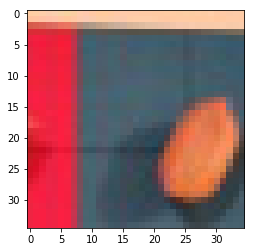

In [13]:
### START CODE HERE ###
img_path = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data\\test\\pb\\218.JPG'
# ### END CODE HERE ###
img = image.load_img(img_path, target_size=(35, 35))
#img = x_test[0]
print(cat_y2_test[0])
imshow(img)
#imshow(x_test[0])

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

print(happyModel.predict(x))

In [25]:
print(happyModel.metrics_names)

['loss', 'dense_5_loss', 'dense_6_loss', 'dense_5_acc', 'dense_6_acc']


In [11]:
print(cat_y2_test[0])

[1. 0. 0.]
